## **Functions**

In [79]:
import shutil
from collections.abc import Sequence
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylim([-0.3,0.4])
    plt.ylabel('output')
    plt.legend()
    plt.show()

# def to_sequences(seq_size, data):
#     x = []
#     y = []
#     for i in range(len(data)-seq_size-1):
#         #print(i)
#         window = data[i:(i+seq_size)]
#         after_window = data[i+seq_size]
#         window = [[x] for x in window]
#         #print("{} - {}".format(window,after_window))
#         x.append(window)
#         y.append(after_window)

#     return np.array(x),np.array(y)

def to_sequences(seq_size, data1, data2):
    x = []
    y = []

    for i in range(len(data1)-seq_size):
        #print(i)
        window = data1[i:(i+seq_size)]
        after_window = data2[i+seq_size]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)

    return np.array(x), np.array(y)

## **Loading Data**

In [81]:
import numpy as np
import pandas as pd
import os
import io
import requests
import sklearn
from aeon.datasets import load_regression
X, y, meta_data = load_regression("Covid3Month")
print(" Shape of X = ", X.shape)
print(" Shape of y = ", y.shape)
print(" Meta data = ", meta_data)

 Shape of X =  (201, 1, 84)
 Shape of y =  (201,)
 Meta data =  {'problemname': 'covid3month', 'timestamps': False, 'missing': False, 'univariate': True, 'equallength': True, 'classlabel': False, 'targetlabel': True, 'class_values': []}


## **Splitting Data to Train and Test**

In [82]:
import numpy as np
import pandas as pd
import os
import io
import requests
import sklearn
from aeon.datasets import load_regression
X_train, y_train = load_regression(
    "Covid3Month", extract_path="./Temp/", split="TRAIN", return_metadata=False
)
X_test, y_test = load_regression(
    "Covid3Month", extract_path="./Temp/", split="test", return_metadata=False
)
print("Train shape = ", X_train.shape)
print("Test shape = ", X_test.shape)
print("Train shape = ", y_train.shape)
print("Test shape = ", y_test.shape)

Train shape =  (140, 1, 84)
Test shape =  (61, 1, 84)
Train shape =  (140,)
Test shape =  (61,)


In [83]:
X_train

array([[[  0.,   0.,   0., ...,   0.,   0.,  12.]],

       [[  0.,   0.,   0., ...,   9.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   0.,   0.,   0.]],

       ...,

       [[  0.,   0.,   0., ...,  65.,  39.,  36.]],

       [[  0.,   0.,   0., ..., 128., 114.,  90.]],

       [[  0.,   0.,   0., ...,   4.,   7.,   5.]]])

In [84]:
y_train

array([0.        , 0.07758621, 0.        , 0.        , 0.15400309,
       0.05555556, 0.00467563, 0.02857143, 0.00805611, 0.04794211,
       0.07079646, 0.02558824, 0.00958466, 0.08068783, 0.1       ,
       0.        , 0.01089701, 0.06451613, 0.04054054, 0.02373339,
       0.02752294, 0.12765957, 0.06060606, 0.03533314, 0.00687285,
       0.06413938, 0.04545455, 0.08181818, 0.02567976, 0.04218472,
       0.02906287, 0.10318238, 0.07017544, 0.03276131, 0.11764706,
       0.0396734 , 0.09703504, 0.05594406, 0.01045296, 0.        ,
       0.03333333, 0.08394227, 0.00552975, 0.0164468 , 0.        ,
       0.        , 0.04715102, 0.        , 0.02777778, 0.01413428,
       0.11111111, 0.        , 0.04972376, 0.03846154, 0.06756757,
       0.06254257, 0.01162791, 0.04454685, 0.        , 0.02122016,
       0.17307692, 0.01754386, 0.04449649, 0.01569078, 0.        ,
       0.        , 0.        , 0.        , 0.03159324, 0.01886792,
       0.075     , 0.        , 0.00993491, 0.00958216, 0.11111

In [85]:
X_train.dtype

dtype('float64')

## **Normalization**

In [86]:
# convert to float32 for normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')



In [87]:

# normalize the data values to the range [0, 1]
X_train /= 255
X_test /= 255

## **Sequencing Data**

In [88]:
SEQUENCE_SIZE = 10

X_train, y_train= to_sequences(SEQUENCE_SIZE, X_train, y_train)
X_test, y_test = to_sequences(SEQUENCE_SIZE, X_test, y_test)

print("Shape of x_train: {}".format(X_train.shape))
print("Shape of x_test: {}".format(X_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

X_train = X_train.reshape((X_train.shape[0], SEQUENCE_SIZE, X_train.shape[3] * X_train.shape[4]))
X_test = X_test.reshape((X_test.shape[0], SEQUENCE_SIZE, X_test.shape[3] * X_test.shape[4]))

print("Shape of x_train: {}".format(X_train.shape))
print("Shape of x_test: {}".format(X_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (130, 10, 1, 1, 84)
Shape of x_test: (51, 10, 1, 1, 84)
Shape of y_train: (130,)
Shape of y_test: (51,)
Shape of x_train: (130, 10, 84)
Shape of x_test: (51, 10, 84)
Shape of y_train: (130,)
Shape of y_test: (51,)


## **Building Model using bidirectional LSTM followed by Attention layers (Relu & Adam)**

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
from sklearn import metrics
import datetime
import math

input = tf.keras.layers.Input(shape=(SEQUENCE_SIZE, 84))
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(input)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(64, activation = 'relu'))(x)
x = tf.keras.layers.Attention()([x, x, x])
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
output = tf.keras.layers.Dense(1, activation='linear')(x)
model = tf.keras.Model(inputs=input, outputs=output)
model.compile(optimizer = 'adam',
              loss='mean_squared_error')

monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')
checkpointer = ModelCheckpoint(filepath = "best_weights_NN.hdf5", verbose = 0, save_best_only = True)


model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks = [monitor, checkpointer])


Epoch 1/50
5/5 [==============================] - 8s 377ms/step - loss: 0.0190 - val_loss: 0.0054
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.0049

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 0s 64ms/step - loss: 0.0049 - val_loss: 0.0052
Epoch 3/50
5/5 [==============================] - 0s 45ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 4/50
5/5 [==============================] - 0s 85ms/step - loss: 0.0024 - val_loss: 0.0027
Epoch 5/50
5/5 [==============================] - 0s 43ms/step - loss: 0.0018 - val_loss: 0.0036
Epoch 6/50
5/5 [==============================] - 0s 43ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 7/50
5/5 [==============================] - 0s 50ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 8/50
5/5 [==============================] - 0s 47ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 8: early stopping


## **RMSE Score (Relu & Adam)**

5/5 [==============================] - 1s 4ms/step
Score_train (RMSE): 0.037960549662100496
2/2 [==============================] - 0s 6ms/step
Score_test (RMSE): 0.049970196663690375


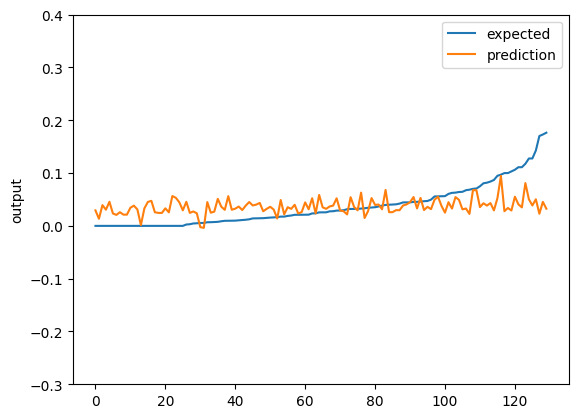

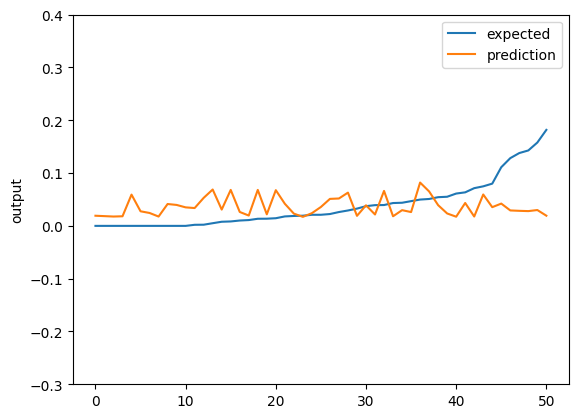

In [90]:
pred_train = model.predict(X_train)
score_train = np.sqrt(metrics.mean_squared_error(pred_train, y_train))
print("Score_train (RMSE): {}".format(score_train))

pred_test = model.predict(X_test)
score_test = np.sqrt(metrics.mean_squared_error(pred_test, y_test))
print("Score_test (RMSE): {}".format(score_test))

# Chart_regression
chart_regression(pred_train.flatten(), y_train, sort = True)
chart_regression(pred_test.flatten(), y_test, sort = True)


## **Building Model using bidirectional LSTM followed by Attention layers (Relu & SGD)**

In [104]:
input = tf.keras.layers.Input(shape=(SEQUENCE_SIZE, 84))
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(input)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(64, activation = 'relu'))(x)
x = tf.keras.layers.Attention()([x, x, x])
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
output = tf.keras.layers.Dense(1, activation='linear')(x)
model = tf.keras.Model(inputs=input, outputs=output)
model.compile(optimizer = 'sgd',
              loss='mean_squared_error')

monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')
checkpointer = ModelCheckpoint(filepath = "best_weights_NN.hdf5", verbose = 0, save_best_only = True)


model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks = [monitor, checkpointer])


Epoch 1/50
5/5 [==============================] - 4s 190ms/step - loss: 0.0079 - val_loss: 0.0036
Epoch 2/50
5/5 [==============================] - 0s 19ms/step - loss: 0.0043 - val_loss: 0.0035
Epoch 3/50
1/5 [=====>........................] - ETA: 0s - loss: 0.0034

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 0s 20ms/step - loss: 0.0041 - val_loss: 0.0034
Epoch 4/50
5/5 [==============================] - 0s 18ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 5/50
5/5 [==============================] - 0s 34ms/step - loss: 0.0038 - val_loss: 0.0032
Epoch 6/50
5/5 [==============================] - 0s 27ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 6: early stopping


## **RMSE Score (Relu & SGD)**

In [105]:
pred_train = model.predict(X_train)
score_train = np.sqrt(metrics.mean_squared_error(pred_train, y_train))
print("Score_train (RMSE): {}".format(score_train))

pred_test = model.predict(X_test)
score_test = np.sqrt(metrics.mean_squared_error(pred_test, y_test))
print("Score_test (RMSE): {}".format(score_test))



5/5 [==============================] - 1s 4ms/step
Score_train (RMSE): 0.05797828713987719
2/2 [==============================] - 0s 6ms/step
Score_test (RMSE): 0.053749158327657615


## **Building Model using bidirectional LSTM followed by Attention layers (tanh & Adam)**

In [93]:
input = tf.keras.layers.Input(shape=(SEQUENCE_SIZE, 84))
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(input)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(64, activation = 'tanh'))(x)
x = tf.keras.layers.Attention()([x, x, x])
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation = 'tanh')(x)
output = tf.keras.layers.Dense(1, activation='linear')(x)
model = tf.keras.Model(inputs=input, outputs=output)
model.compile(optimizer = 'adam',
              loss='mean_squared_error')

monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')
checkpointer = ModelCheckpoint(filepath = "best_weights_NN.hdf5", verbose = 0, save_best_only = True)


model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks = [monitor, checkpointer])


Epoch 1/50
5/5 [==============================] - 11s 204ms/step - loss: 0.1214 - val_loss: 0.0438
Epoch 2/50
5/5 [==============================] - 0s 22ms/step - loss: 0.0528 - val_loss: 0.0352
Epoch 3/50
1/5 [=====>........................] - ETA: 0s - loss: 0.0261

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 0s 25ms/step - loss: 0.0196 - val_loss: 0.0205
Epoch 4/50
5/5 [==============================] - 0s 22ms/step - loss: 0.0138 - val_loss: 0.0142
Epoch 5/50
5/5 [==============================] - 0s 23ms/step - loss: 0.0109 - val_loss: 0.0089
Epoch 6/50
5/5 [==============================] - 0s 22ms/step - loss: 0.0126 - val_loss: 0.0064
Epoch 7/50
5/5 [==============================] - 0s 21ms/step - loss: 0.0069 - val_loss: 0.0062
Epoch 8/50
5/5 [==============================] - 0s 22ms/step - loss: 0.0029 - val_loss: 0.0055
Epoch 9/50
5/5 [==============================] - 0s 21ms/step - loss: 0.0027 - val_loss: 0.0055
Epoch 10/50
5/5 [==============================] - 0s 23ms/step - loss: 0.0025 - val_loss: 0.0052
Epoch 11/50
5/5 [==============================] - 0s 25ms/step - loss: 0.0017 - val_loss: 0.0051
Epoch 12/50
5/5 [==============================] - 0s 22ms/step - loss: 0.0015 - val_loss: 0.0051
Epoch 13/50
5/5 [=====================

## **RMSE Score (tanh & Adam)**

In [94]:
pred_train = model.predict(X_train)
score_train = np.sqrt(metrics.mean_squared_error(pred_train, y_train))
print("Score_train (RMSE): {}".format(score_train))

pred_test = model.predict(X_test)
score_test = np.sqrt(metrics.mean_squared_error(pred_test, y_test))
print("Score_test (RMSE): {}".format(score_test))


5/5 [==============================] - 1s 4ms/step
Score_train (RMSE): 0.03396082638206585
2/2 [==============================] - 0s 5ms/step
Score_test (RMSE): 0.0694819941621517


## **Building Model using bidirectional LSTM followed by Attention layers (tanh & SGD)**

In [97]:
input = tf.keras.layers.Input(shape=(SEQUENCE_SIZE, 84))
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(input)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(64, activation = 'tanh'))(x)
x = tf.keras.layers.Attention()([x, x, x])
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation = 'tanh')(x)
output = tf.keras.layers.Dense(1, activation='linear')(x)
model = tf.keras.Model(inputs=input, outputs=output)
model.compile(optimizer = 'sgd',
              loss='mean_squared_error')

monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')
checkpointer = ModelCheckpoint(filepath = "best_weights_NN.hdf5", verbose = 0, save_best_only = True)


model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks = [monitor, checkpointer])


Epoch 1/50
5/5 [==============================] - 11s 1s/step - loss: 0.0185 - val_loss: 0.0274
Epoch 2/50
1/5 [=====>........................] - ETA: 0s - loss: 0.0091

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 0s 69ms/step - loss: 0.0089 - val_loss: 0.0065
Epoch 3/50
5/5 [==============================] - 0s 59ms/step - loss: 0.0095 - val_loss: 0.0167
Epoch 4/50
5/5 [==============================] - 0s 28ms/step - loss: 0.0060 - val_loss: 0.0143
Epoch 5/50
5/5 [==============================] - 0s 28ms/step - loss: 0.0054 - val_loss: 0.0123
Epoch 6/50
5/5 [==============================] - 0s 22ms/step - loss: 0.0063 - val_loss: 0.0204
Epoch 7/50
5/5 [==============================] - 0s 37ms/step - loss: 0.0049 - val_loss: 0.0130
Epoch 7: early stopping


## **RMSE Score (tanh & SGD)**

In [98]:
pred_train = model.predict(X_train)
score_train = np.sqrt(metrics.mean_squared_error(pred_train, y_train))
print("Score_train (RMSE): {}".format(score_train))

pred_test = model.predict(X_test)
score_test = np.sqrt(metrics.mean_squared_error(pred_test, y_test))
print("Score_test (RMSE): {}".format(score_test))



5/5 [==============================] - 1s 3ms/step
Score_train (RMSE): 0.06543914581159001
2/2 [==============================] - 0s 5ms/step
Score_test (RMSE): 0.1139911884122589
